<a href="https://colab.research.google.com/github/athanvi2/ISM-2020-2021/blob/main/Stock_Market_Analysis_ISM_20_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Statements

In [ ]:
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Loading Company Data

In [ ]:
# Load Data/Company Name
company = 'FB' #Change ticker here

#The range of dates
start = dt.datetime(2019,1,1)
end = dt.datetime(2021,1,1)

data = web.DataReader(company, 'yahoo', start, end)

data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999
...,...,...,...,...,...,...
2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994
2020-12-28,277.299988,265.660004,268.739990,277.000000,23299700,277.000000
2020-12-29,280.510010,276.279999,276.950012,276.779999,16383000,276.779999


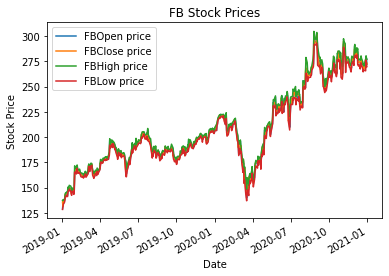

In [ ]:
#Analysis using matplotlib (graphing)
data['Open'].plot(label = company + 'Open price')
data['Close'].plot(label = company + 'Close price')
data['High'].plot(label = company + 'High price')
data['Low'].plot(label = company + 'Low price')
plt.legend()
plt.title(company + ' Stock Prices')
plt.ylabel('Stock Price')
plt.show()

In [ ]:
# Prepare Data for Model
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60 #How many days the predicitive model will be based on#

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x - prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))




In [ ]:
#Build the Model
model = Sequential()

#Learn LSTM (Long Short Term Memory)
model.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1], 1))) #Input (1st) Layer
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True)) #Middle Layer
model.add(Dropout(0.2))
model.add(LSTM(units = 50)) #Final Layer
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Prediction of the next closing price

model.compile(optimizer = 'adam', loss = 'mean_squared_error') #math concepts for loss function and optimization
model.fit(x_train, y_train, epochs=25, batch_size=32)




Epoch 1/25
13/13 [==============================] - 6s 116ms/step - loss: 0.1738
Epoch 2/25
13/13 [==============================] - 1s 111ms/step - loss: 0.0236
Epoch 3/25
13/13 [==============================] - 2s 115ms/step - loss: 0.0140
Epoch 4/25
13/13 [==============================] - 2s 117ms/step - loss: 0.0101
Epoch 5/25
13/13 [==============================] - 2s 117ms/step - loss: 0.0093
Epoch 6/25
13/13 [==============================] - 2s 118ms/step - loss: 0.0095
Epoch 7/25
13/13 [==============================] - 1s 114ms/step - loss: 0.0087
Epoch 8/25
13/13 [==============================] - 2s 117ms/step - loss: 0.0093
Epoch 9/25
13/13 [==============================] - 2s 115ms/step - loss: 0.0083
Epoch 10/25
13/13 [==============================] - 2s 116ms/step - loss: 0.0072
Epoch 11/25
13/13 [==============================] - 2s 118ms/step - loss: 0.0074
Epoch 12/25
13/13 [==============================] - 1s 115ms/step - loss: 0.0071
Epoch 13/25
13/13 [======

TEST THE MODEL ACCURACY ON EXISTING DATA

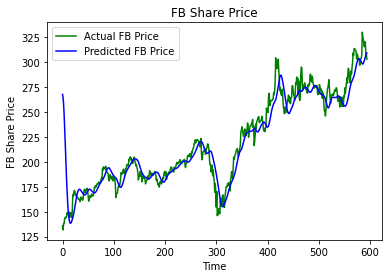

In [ ]:
test_start = dt.datetime(2019,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis = 0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


#Make Predictions on test data

x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

#PLOT THE TEST PREDICTIONS
plt.plot(actual_prices, color="green", label = f"Actual {company} Price")
plt.plot(predicted_prices, color = "blue", label = f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()


In [ ]:
real_data = [model_inputs[len(model_inputs) + 1  - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction Price: {prediction}")

# Load Data/Company Name
company = 'FB' #Change Ticker here

#The range of dates
start = dt.datetime(2021,5,12)
end = dt.datetime(2021,5,12)

dataToday = web.DataReader(company, 'yahoo', start, end)

data
print()
print(f"Actual Price: {dataToday['Close']}")

Prediction Price: [[308.7388]]

Actual Price: Date
2021-05-12    302.549988
Name: Close, dtype: float64
